In [4]:
# Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader.data as web

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [5]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

# For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)
    
# Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [6]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,132.317610,133.237729,131.483227,132.450757,131.277940,2.967528e+07
std,17.455831,17.462447,17.290970,17.350720,17.812066,1.386030e+07
min,102.650002,105.720001,102.529999,103.129997,101.342369,1.147590e+07
25%,115.155002,116.189999,114.069999,115.579998,113.774490,2.134540e+07
50%,137.380005,137.479996,136.699997,137.110001,136.012268,2.619550e+07
75%,145.819999,147.180001,145.035004,146.309998,145.381653,3.346835e+07
max,161.940002,162.509995,160.149994,161.600006,161.600006,1.119850e+08


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-08-29 to 2017-08-25
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


 let's go ahead and plot out the volume and closing price of the stocks

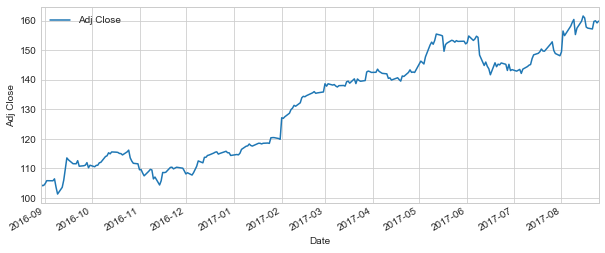

In [8]:
AAPL['Adj Close'].plot(legend = True, figsize=(10,4))
plt.ylabel('Adj Close')

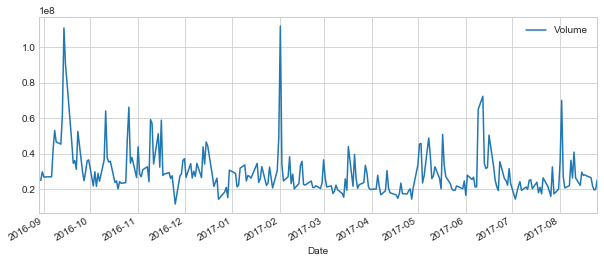

In [9]:
AAPL['Volume'].plot(legend = True, figsize=(10,4))

let's go ahead and caculate the moving average for the stock

In [10]:
ma_day = [10, 20, 50]

for ma in ma_day:
    col_name = 'SMA for %s days' %(str(ma))
    # AAPL[col_name] = pd.rolling_mean(AAPL['Adj Close'],ma)
    AAPL[col_name] = AAPL['Adj Close'].rolling(ma).mean()

AAPL.head()    

,Open,High,Low,Close,Adj Close,Volume,SMA for 10 days,SMA for 20 days,SMA for 50 days
Date,,,,,,,,,
2016-08-29,106.620003,107.440002,106.290001,106.820000,104.968414,24970300,NaN,NaN,NaN
2016-08-30,105.800003,106.500000,105.500000,106.000000,104.162621,24863900,NaN,NaN,NaN
2016-08-31,105.660004,106.570000,105.639999,106.099998,104.260887,29662400,NaN,NaN,NaN
2016-09-01,106.139999,106.800003,105.620003,106.730003,104.879982,26701500,NaN,NaN,NaN
2016-09-02,107.699997,108.000000,106.820000,107.730003,105.862648,26802500,NaN,NaN,NaN


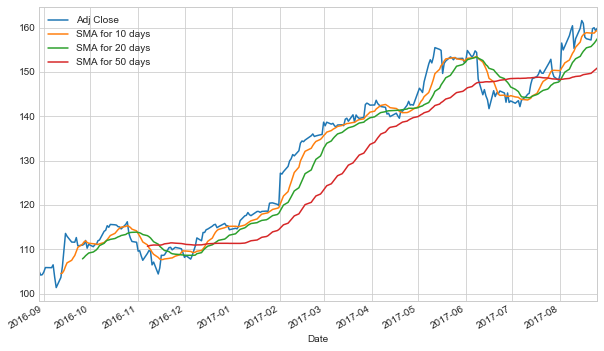

In [11]:
AAPL[['Adj Close', 'SMA for 10 days', 'SMA for 20 days', 'SMA for 50 days']].plot(figsize=(10,6))

We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

In [12]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,SMA for 10 days,SMA for 20 days,SMA for 50 days,Daily Return
Date,,,,,,,,,,
2016-08-29,106.620003,107.440002,106.290001,106.820000,104.968414,24970300,NaN,NaN,NaN,NaN
2016-08-30,105.800003,106.500000,105.500000,106.000000,104.162621,24863900,NaN,NaN,NaN,-0.007677
2016-08-31,105.660004,106.570000,105.639999,106.099998,104.260887,29662400,NaN,NaN,NaN,0.000943
2016-09-01,106.139999,106.800003,105.620003,106.730003,104.879982,26701500,NaN,NaN,NaN,0.005938
2016-09-02,107.699997,108.000000,106.820000,107.730003,105.862648,26802500,NaN,NaN,NaN,0.009369


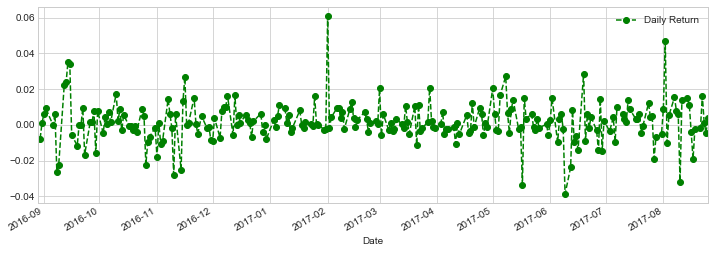

In [13]:
AAPL['Daily Return'].plot(figsize=(12,4),linestyle='--',marker='o',color='g',legend = True)

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


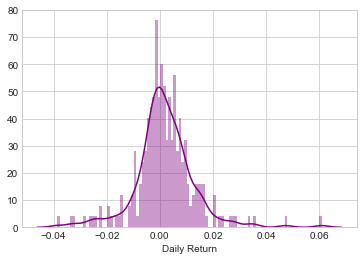

In [14]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color='purple')

Now what if we wanted to analyze the returns of all the stocks in our list?

In [15]:
closing_df = AAPL['Adj Close']
closing_df = DataFrame(closing_df)
closing_df.columns = ['AAPL']

closing_df['GOOG'] = GOOG['Adj Close']
closing_df['MSFT'] = MSFT['Adj Close']
closing_df['AMZN'] = AMZN['Adj Close']

closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2016-08-29,104.968414,772.150024,56.733185,771.289978
2016-08-30,104.162621,769.090027,56.528126,767.580017
2016-08-31,104.260887,767.049988,56.108238,769.159973
2016-09-01,104.879982,768.780029,56.235180,770.619995
2016-09-02,105.862648,771.460022,56.313301,772.440002


In [16]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2016-08-29,NaN,NaN,NaN,NaN
2016-08-30,-0.007677,-0.003963,-0.003614,-0.004810
2016-08-31,0.000943,-0.002653,-0.007428,0.002058
2016-09-01,0.005938,0.002255,0.002262,0.001898
2016-09-02,0.009369,0.003486,0.001389,0.002362


Now we can compare the daily percentage return of two stocks to check how correlated.

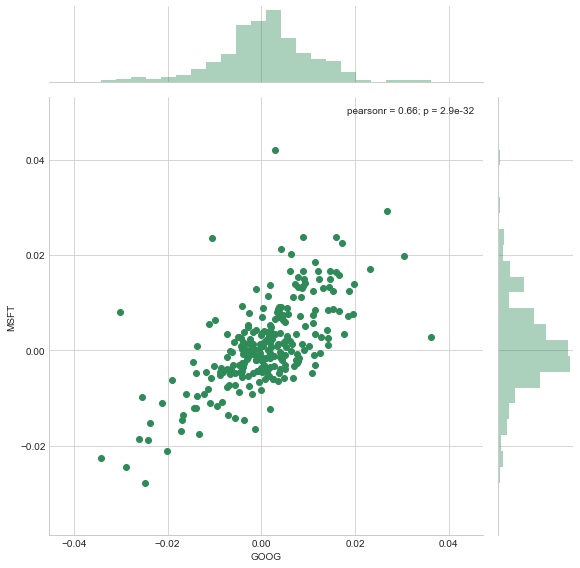

In [17]:
# Google vs. Microsoft
sns.jointplot('GOOG','MSFT', data = tech_rets.dropna() ,kind = 'scatter', color='seagreen', size=8)

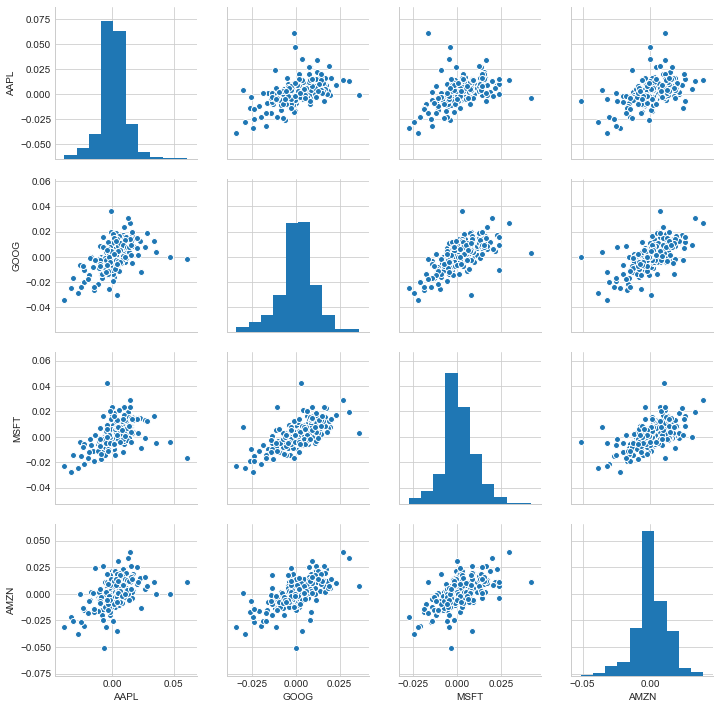

In [18]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

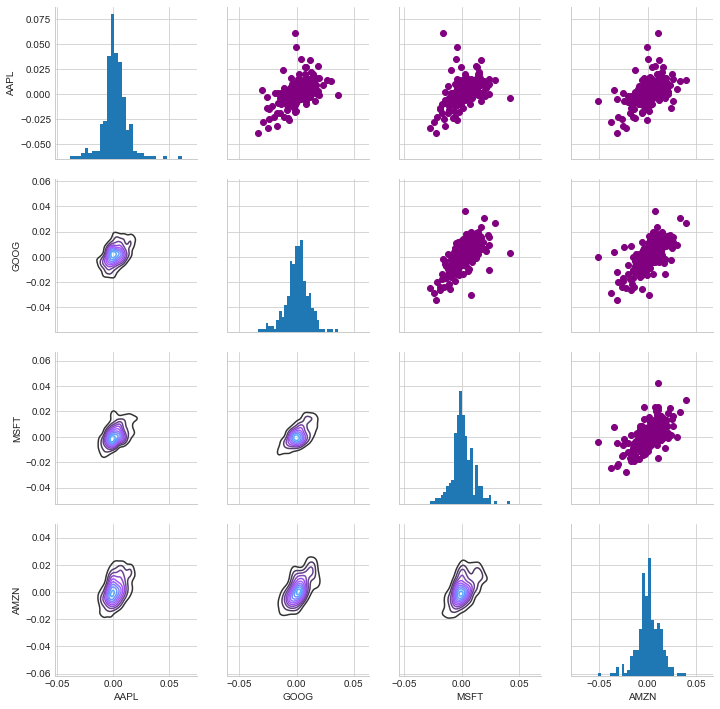

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color = 'purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins = 30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

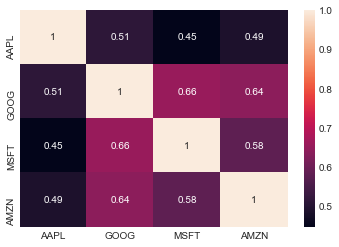

In [20]:
# plot correlation matrix
corrmat = tech_rets.dropna().corr()

sns.heatmap(corrmat,annot=True)

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

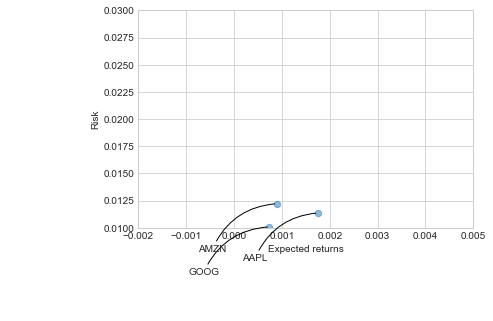

In [21]:
tech_rets_clean = tech_rets.dropna()

plt.scatter(tech_rets_clean.mean(), tech_rets_clean.std(), alpha = 0.5, s = 40)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

plt.xlim([-0.002,0.005])
plt.ylim([0.01,0.03])

for label, x, y in zip(tech_rets_clean.columns, tech_rets_clean.mean(), tech_rets_clean.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-50, -50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3'))

In [22]:
tech_rets_clean.columns

Index(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype='object')